In [14]:
import numpy as np
import pylab as plt
import netCDF4 as nc
import os
from scipy import ndimage

In [17]:
#Loop over the columns 
N = 4
column_data = []
for n in range(N):
    path = './FinalUpwind/couple_' + str(n)
    path = os.path.join(path, 'rico')
    path = os.path.join(path, 'stats.nc')
    column_data.append(nc.Dataset(path, 'r'))

28571.428571428572 920
29.444444444444443
29.444444444444443
29.4375
29.4375


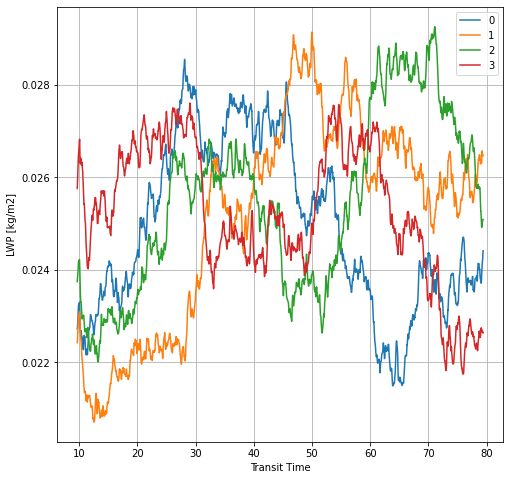

In [23]:
#var = 'LWP'
#plt.figure()
lwp_mean = []
data_pack = []
plt.figure(figsize=(8,8))
#Nt = 23 * 6
circ = 50 * 1000 * 4 / 7.0
Nt = np.int(circ/1200.0) * 40

print(circ, Nt)
#circ=86400.
#6*12#6 * 24*4#* 48
for n in range(N):
    #plt.subplot(4,1,n+1)
    micro = column_data[n]['MicroBase']
    data = micro['timeseries']['LWP'][:] # +  micro['timeseries']['VWP'][:] +  micro['timeseries']['RWP'][:]
    lwp_mean.append(np.mean(data[-Nt:]))
    #data = ndimage.gaussian_filter1d(data, 5 * 5 )
    data = np.convolve(data, np.ones(Nt)/Nt, mode='valid')
    time = micro['timeseries']['time'][:]
    print(np.amax(time)/86400)
    time = np.convolve(time, np.ones(Nt)/Nt, mode='valid')
    plt.plot(time/(circ),data,label=str(n))
    data_pack.append(data)
    plt.xlabel('Transit Time')
    plt.ylabel('LWP [kg/m2]')
    #print(np.mean(data[-60*2:]))

plt.legend()
plt.grid()
plt.savefig('qc.png', dpi=400)
    #plt.ylim(0.0, 0.41)

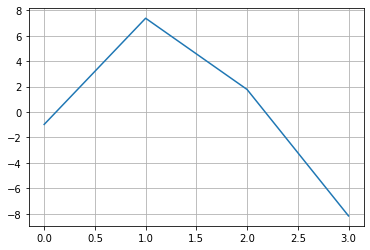

In [25]:
plt.plot(100.0*(np.array(lwp_mean)-np.mean(lwp_mean))/np.mean(lwp_mean))
plt.grid()

In [20]:
def convert_to_array(data_pack):
    
    min_len = 0
    for d in data_pack:
        min_len = np.maximum(len(d), min_len)
    
    
    #Now stack the array
    array = None
    for d in data_pack:

        if array is None:
            array = d
        else:
            array = np.vstack((array[:min_len],d))
    
    print(np.shape(array))    
    return



#print(data_pack)
#convert_to_array(data_pack)

13.609713097715915
13.671853405556906
13.831347510763447
1.5384583284547637e+34


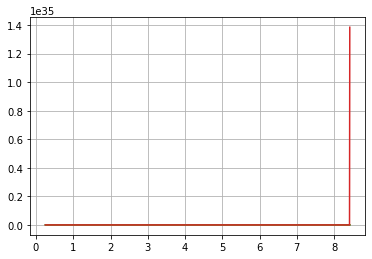

In [6]:
grp = 'Surface'
var = 'shf'
#plt.figure()
data_pack = []
Nt = 3 * 24 * 1
for n in range(N):
    micro = column_data[n][grp]
    data = micro['timeseries'][var][1:]
    data = np.convolve(data, np.ones(Nt)/Nt, mode='valid')
    time = micro['timeseries']['time'][1:]
    time = np.convolve(time, np.ones(Nt)/Nt, mode='valid')
    plt.plot(time/86400 ,data)
    data_pack.append(data)
    
    print(np.mean(data[-9:]))
    
plt.grid()

-6.9179881887471515
-6.916583999031658
-6.896758715767684
-6.898139096350372


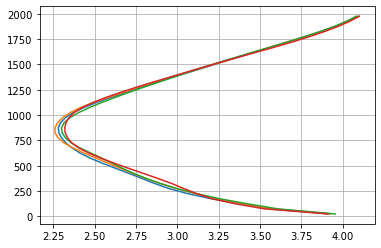

In [7]:
grp = 'VelocityState'
var = 'u'
#plt.figure()
data_pack = []
for n in range(N):
    micro = column_data[n][grp]
    data = np.mean(micro['profiles'][var][-60:,:40], axis=0)
    z = micro['profiles']['z'][:40]
    plt.plot(data, z)
    data_pack.append(data)
    
    print(np.mean(data[-360:]) - 9.9)
    
plt.grid()
plt.savefig('u.png')





4.247314218303723e-06
5.301397490834667e-06
4.865812123617793e-06
5.018913734257198e-06


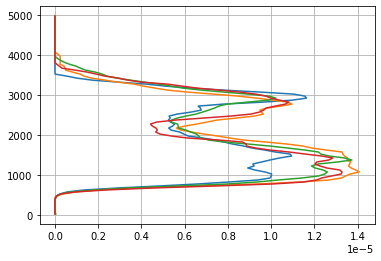

In [8]:
grp = 'ScalarState'
var = 'qc'
#plt.figure()
data_pack = []
for n in range(N):
    micro = column_data[n][grp]
    data = np.mean(micro['profiles'][var][-3*48:,:], axis=0) 
    z = micro['profiles']['z'][:]
    plt.plot(data, z)
    data_pack.append(data)
    
    print(np.mean(data[-3*72:]))
    
plt.grid()
plt.savefig('qc2.png')

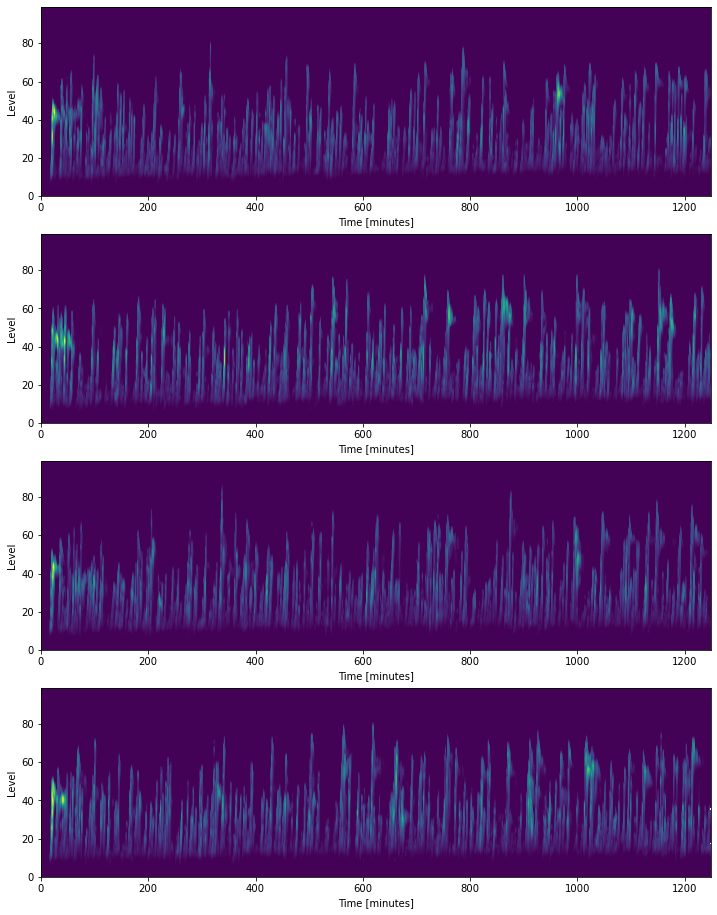

In [9]:
grp = 'ScalarState'
var = 'qc'
plt.figure(figsize=(12,16))
for n in range(N):
    plt.subplot(4,1,n+1)
    micro = column_data[n][grp]
    data = micro['profiles'][var][:,:]
    #z = micro['profiles']['z'][:]
    plt.contourf(data.T, 100)
    plt.xlabel('Time [minutes]')
    plt.ylabel('Level')
plt.savefig('qc_cross.png')


    

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    dimensions(sizes): 
    variables(dimensions): 
    groups: couple_0, couple_1, couple_2, couple_3
<class 'netCDF4._netCDF4.Group'>
group /couple_0:
    dimensions(sizes): z(100), t(1248)
    variables(dimensions): float64 z(z), float64 t(t), float64 qv_ss_forcing(t,z), float64 qv_ls_forcing(t,z), float64 qv_ls_state(t,z), float64 qc_ss_forcing(t,z), float64 qc_ls_forcing(t,z), float64 qc_ls_state(t,z), float64 s_ss_forcing(t,z), float64 s_ls_forcing(t,z), float64 s_ls_state(t,z)
    groups: 
624
<class 'netCDF4._netCDF4.Group'>
group /couple_1:
    dimensions(sizes): z(100), t(1248)
    variables(dimensions): float64 z(z), float64 t(t), float64 qv_ss_forcing(t,z), float64 qv_ls_forcing(t,z), float64 qv_ls_state(t,z), float64 qc_ss_forcing(t,z), float64 qc_ls_forcing(t,z), float64 qc_ls_state(t,z), float64 s_ss_forcing(t,z), float64 s_ls_forcing(t,z), float64 s_ls_state(t,z)
    groups: 
624
<clas

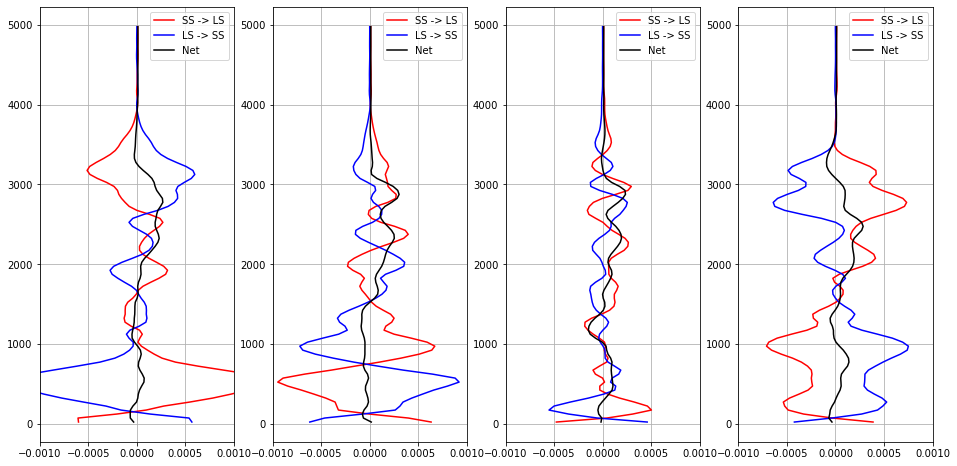

In [10]:
couple_grp = nc.Dataset('couple_out_rico.nc', 'r')
print(couple_grp)



plt.figure(figsize=(16,8))
count = 1

for c in couple_grp.groups:
    plt.subplot(1,4,count)
    grp_n = couple_grp[c]
    
    print(grp_n)

    n = int(len(grp_n['t'][:])*5/10.)
    print(n)
    
    qc_ss_forcing = np.mean(grp_n['qc_ss_forcing'][-n:,:], axis=0)
    qc_ls_forcing = np.mean(grp_n['qc_ls_forcing'][-n:,:], axis=0)
    
    qv_ss_forcing = np.mean(grp_n['qv_ss_forcing'][-n:,:], axis=0) # * 0.0
    qv_ls_forcing = np.mean(grp_n['qv_ls_forcing'][-n:,:], axis=0) # * 0.0
    
    net_q_ss = qc_ss_forcing +  qv_ss_forcing
    net_q_ls = qc_ls_forcing+  qv_ls_forcing
    net_q = net_q_ss + net_q_ls
    
    z = grp_n['z'][:]
    
    plt.plot((net_q_ss) * 86400, z, '-r', label = 'SS -> LS')
    plt.plot((net_q_ls)* 86400, z, '-b', label = 'LS -> SS')
    plt.plot((net_q) * 86400, z, '-k', label='Net')
    count += 1 
    plt.grid()
    plt.legend()
    plt.xlim(-0.001, 0.001)

<class 'netCDF4._netCDF4.Group'>
group /couple_0:
    dimensions(sizes): z(100), t(1248)
    variables(dimensions): float64 z(z), float64 t(t), float64 qv_ss_forcing(t,z), float64 qv_ls_forcing(t,z), float64 qv_ls_state(t,z), float64 qc_ss_forcing(t,z), float64 qc_ls_forcing(t,z), float64 qc_ls_state(t,z), float64 s_ss_forcing(t,z), float64 s_ls_forcing(t,z), float64 s_ls_state(t,z)
    groups: 
624
<class 'netCDF4._netCDF4.Group'>
group /couple_1:
    dimensions(sizes): z(100), t(1248)
    variables(dimensions): float64 z(z), float64 t(t), float64 qv_ss_forcing(t,z), float64 qv_ls_forcing(t,z), float64 qv_ls_state(t,z), float64 qc_ss_forcing(t,z), float64 qc_ls_forcing(t,z), float64 qc_ls_state(t,z), float64 s_ss_forcing(t,z), float64 s_ls_forcing(t,z), float64 s_ls_state(t,z)
    groups: 
624
<class 'netCDF4._netCDF4.Group'>
group /couple_2:
    dimensions(sizes): z(100), t(1248)
    variables(dimensions): float64 z(z), float64 t(t), float64 qv_ss_forcing(t,z), float64 qv_ls_forcing(

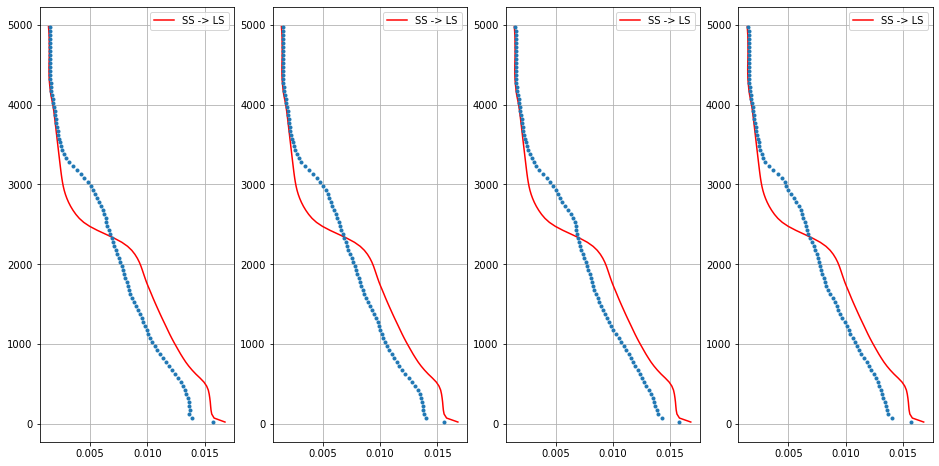

In [11]:
count = 1
plt.figure(figsize=(16,8))
for c in couple_grp.groups:
    plt.subplot(1,4,count)
    grp_n = couple_grp[c]
    
    print(grp_n)

    n = int(len(grp_n['t'][:])*5/10.)
    print(n)
    
    qv = np.mean(grp_n['qv_ls_state'][:1,:], axis=0)

    z = grp_n['z'][:]
    
    micro = column_data[count - 1]['ScalarState']
    data = np.mean(micro['profiles']['qv'][-12:,:], axis=0) 
    
    
    plt.plot((qv), z, '-r', label = 'SS -> LS')
    plt.plot(data,z, '.')
    #plt.plot((net_q_ls)* 86400, z, '-b', label = 'LS -> SS')
    #plt.plot((net_q) * 86400, z, '-k', label='Net')
    count += 1 
    plt.grid()
    plt.legend()
    #plt.xlim(-0.005, 0.005)

28571.428571428572 230
7.028986263414574e-07
7.26489827749736e-07
7.763096888966932e-07
8.053799444073859e-07


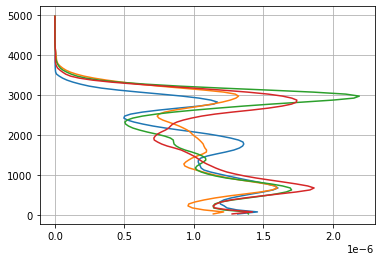

In [12]:
grp = 'DiagnosticsTurbulence'
var = 'qv_squared'
plt.figure(3)
data_pack = []
circ = 50 * 1000 * 4 / 7.0
Nt = np.int(circ/1200.0) * 10

print(circ, Nt)
var_max = []
for n in range(N):
    micro = column_data[n][grp]
    var = micro['profiles']['qt2'][-Nt:,:] #- micro['profiles']['qv'][-Nt:,:]*micro['profiles']['qv'][-Nt:,:]
    data = np.mean(var, axis=0) 
    var_max.append(np.mean(data[:]))
    z = micro['profiles']['z'][:]
    plt.plot(data, z)
    data_pack.append(data)
    
    print(np.mean(data[-3*72:]))
    
plt.grid()
plt.savefig('qc2.png')

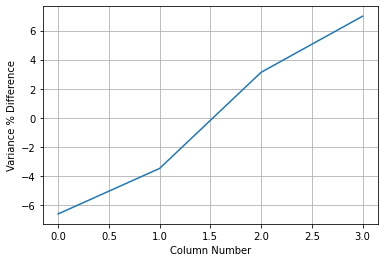

In [13]:
var_max_a = 100.0*(np.array(var_max)-np.mean(var_max))/np.mean(var_max)


plt.figure(3)
plt.plot(var_max_a)
plt.xlabel('Column Number')
plt.ylabel('Variance % Difference')
plt.grid()
plt.savefig('qv_variance_diff.png')